In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Bài 1

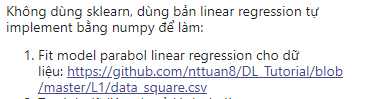

In [64]:
data = pd.read_csv('data_square.csv').values
data[0:5]

array([[  30.    , -100.    ],
       [  32.4138, -190.725 ],
       [  34.8276, -269.798 ],
       [  37.2414, -337.218 ],
       [  39.6552, -392.985 ]])

In [65]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [56]:
x[0:5]

array([[30.    ],
       [32.4138],
       [34.8276],
       [37.2414],
       [39.6552]])

In [7]:
y[0:5]

array([[-100.   ],
       [-190.725],
       [-269.798],
       [-337.218],
       [-392.985]])

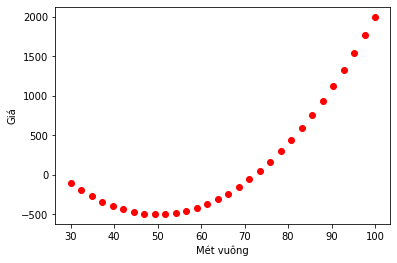

In [8]:
plt.plot(x.T, y.T, 'ro')
plt.xlabel('Mét vuông')
plt.ylabel('Giá')
plt.show()

# *Sau khi plot dữ liệu ta thấy mối quan hệ của x và y tạo thành 1 đường parabol => áp dụng nonlinear regression với hàm bậc 2 => quy về linear regression bình thường với ẩn bậc 2

# *Ta giả sử hàm ban đầu có dạng: 
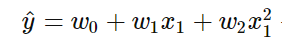

# *Để đưa hàm trên về dạng linear, ta đặt ẩn phụ: 
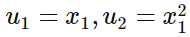

# Y_hat trở thành: 
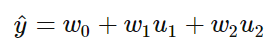

# *Lúc này hàm đã giống hệt dạng linear => làm tương tự linear

In [9]:
u_1 = x
u_2 = x**2

In [10]:
u_1[:4]

array([[30.    ],
       [32.4138],
       [34.8276],
       [37.2414]])

In [11]:
u_2[:4]

array([[ 900.        ],
       [1050.65443044],
       [1212.96172176],
       [1386.92187396]])

In [12]:
one = np.ones((data.shape[0], 1))
xbar = np.concatenate((one, u_1, u_2), axis = 1)

In [13]:
#xbar = np.concatenate((xbar, u_2), axis = 1)

In [14]:
xbar[:4]

array([[1.00000000e+00, 3.00000000e+01, 9.00000000e+02],
       [1.00000000e+00, 3.24138000e+01, 1.05065443e+03],
       [1.00000000e+00, 3.48276000e+01, 1.21296172e+03],
       [1.00000000e+00, 3.72414000e+01, 1.38692187e+03]])

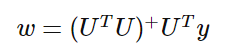

In [15]:
A = np.dot(xbar.T, xbar)
b = np.dot(xbar.T, y)
w = np.dot(np.linalg.pinv(A), b) #Giả nghịch đảo
print('w = ', w)

w =  [[ 2.00000579e+03]
 [-1.00000222e+02]
 [ 1.00000199e+00]]


In [16]:
w_0 = w[0][0]
w_1 = w[1][0]
w_2 = w[2][0]
x0 = np.linspace(20, 110, 50, endpoint=True) 
y0 = w_0 + w_1*x0 +w_2*(x0**2)

In [17]:
x0

array([ 20.        ,  21.83673469,  23.67346939,  25.51020408,
        27.34693878,  29.18367347,  31.02040816,  32.85714286,
        34.69387755,  36.53061224,  38.36734694,  40.20408163,
        42.04081633,  43.87755102,  45.71428571,  47.55102041,
        49.3877551 ,  51.2244898 ,  53.06122449,  54.89795918,
        56.73469388,  58.57142857,  60.40816327,  62.24489796,
        64.08163265,  65.91836735,  67.75510204,  69.59183673,
        71.42857143,  73.26530612,  75.10204082,  76.93877551,
        78.7755102 ,  80.6122449 ,  82.44897959,  84.28571429,
        86.12244898,  87.95918367,  89.79591837,  91.63265306,
        93.46938776,  95.30612245,  97.14285714,  98.97959184,
       100.81632653, 102.65306122, 104.48979592, 106.32653061,
       108.16326531, 110.        ])

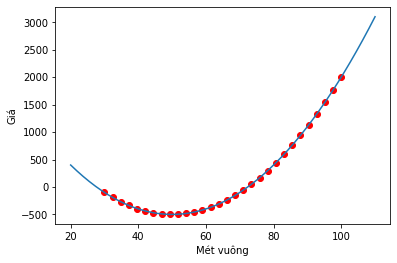

In [18]:
plt.plot(x.T, y.T, 'ro')     # data 
plt.plot(x0, y0)             # the fitting line
plt.xlabel('Mét vuông')
plt.ylabel('Giá')
plt.show()

# Bài 2

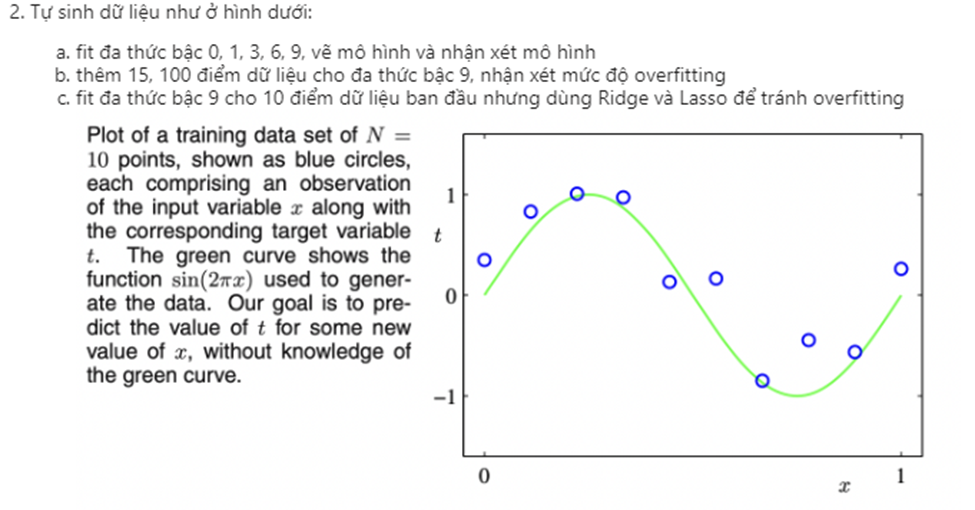

# Bài 2a

In [167]:
class LinearRegression:
    def __init__(self):
        self.theta = None
        self.data_prob2 = np.array(
         [[0,    0.3],
          [0.11, 0.8],
          [0.22, 1],
          [0.33, 0.9],
          [0.46, 0.1],
          [0.55, 0.15],
          [0.66, -0.9],
          [0.77, -0.45],
          [0.85, -0.55],
          [1, 0.2]])
        
    def fit(self, x, y):  # x là 1 list các feature đã được reshape thành cột
        """Xuất ra theta từ dữ liệu train"""
        
        one = np.ones((len(y), 1))
        
        if x:
            xbar = np.concatenate((one, x[0]), axis = 1)
            for i in range(1, len(x)):
                xbar = np.concatenate((xbar, x[i]), axis = 1)
        else:
            xbar = one
            
        A = np.dot(xbar.T, xbar)
        b = np.dot(xbar.T, y)
        self.theta = np.dot(np.linalg.pinv(A), b) #Giả nghịch đảo
        
        return self.theta
    
        
    def ridge_fit(self, alpha, X, Y, polynomial_degree):

        X_process = np.copy(X)
        if polynomial_degree > 1:
            for i in range(2, polynomial_degree + 1):
                X_i = X**i 
                X_process = np.concatenate((X_process, X_i), axis = 1)
        elif polynomial_degree == 1:
            pass 
        elif polynomial_degree == 0:
            X_process = [0] * X_process.shape[0]

        X_process = np.insert(X_process, 0, [1] * X_process.shape[0], axis = 1)
        self.theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_process), X_process)+(alpha*np.identity(Y.shape[0]))), np.transpose(X_process)), Y)
        
        return self.theta
    
    def plot(self, x, y):
        """Vẽ điểm dữ liệu ban đầu và đường dự đoán"""
        
        #đưa theta về lại 1 list
        w = np.array([None]*10)
        w[0] = self.theta[0][0]
        
        for i in range(1, len(self.theta)):
            w[i] = self.theta[i][0]
        print(w)
        print("\n", w[0])
        
        #plot
        x0 = np.linspace(0, 1, 1000, endpoint=True)
        y0 = np.array([w[0]]*len(x0))
        print("\n", x0)
        print("\n", y0)
        print("\n", len(self.theta))
        for i in range(1, len(self.theta)): #tích vô hướng
            y0 = y0 + w[i]*(x0**i) 
    
        plt.plot(x.T, y.T, 'ro')     # data ban đầu vẽ thành chấm đỏ
        plt.plot(x0, y0)             # the fitting line
        plt.xlabel('x')
        plt.ylabel('t')
        plt.show()

In [161]:
data_prob2 = np.array(
         [[0,    0.3],
          [0.11, 0.8],
          [0.22, 1],
          [0.33, 0.9],
          [0.46, 0.1],
          [0.55, 0.15],
          [0.66, -0.9],
          [0.77, -0.45],
          [0.85, -0.55],
          [1, 0.2]])

data_prob2[:3]

array([[0.  , 0.3 ],
       [0.11, 0.8 ],
       [0.22, 1.  ]])

In [162]:
x = data_prob2[:, 0].reshape(-1, 1)
t = data_prob2[:, 1].reshape(-1, 1)

In [163]:
x[:3]

array([[0.  ],
       [0.11],
       [0.22]])

In [164]:
t[:3]

array([[0.3],
       [0.8],
       [1. ]])

In [165]:
u_1 = x
u_2 = x**2
u_3 = x**3
u_4 = x**4
u_5 = x**5
u_6 = x**6
u_7 = x**7
u_8 = x**8
u_9 = x**9

w =  [[0.155]]
[0.15500000000000003 None None None None None None None None None]

 0.15500000000000003

 [0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 

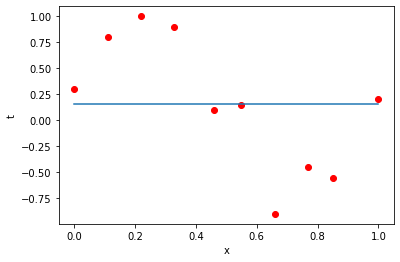

In [168]:
# bậc 0
test_0 = LinearRegression()
test_0.fit(x = None, y= t)
print("w = ", test_0.theta)
test_0.plot(x, t)

# Super mega ultra Underfitting, không có giá trị dự đoán

w =  [[ 0.77950216]
 [-1.26162052]]


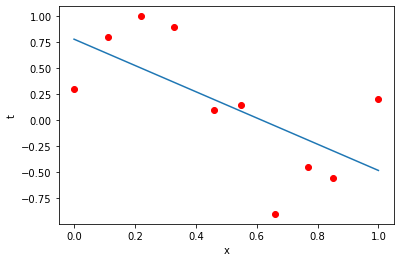

In [107]:
# bậc 1
test_1 = LinearRegression()
test_1.fit(x = [u_1], y= t)
print("w = ", test_1.theta)
test_1.plot(x, t)

# Underfitting, có một chút giá trị dự đoán nhưng loss cao

w =  [[  0.28267724]
 [  7.84541063]
 [-24.92589036]
 [ 17.04125374]]


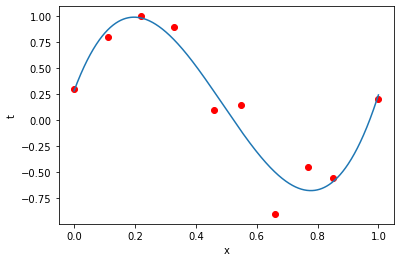

In [108]:
# bậc 3
test_3 = LinearRegression()
test_3.fit(x = [u_1, u_2, u_3], y= t)
print("w = ", test_3.theta)
test_3.plot(x, t)

# Good

w =  [[  0.30065958]
 [  4.96079594]
 [  1.27060716]
 [-57.23509479]
 [ 76.18424062]
 [-14.785275  ]
 [-10.50098182]]


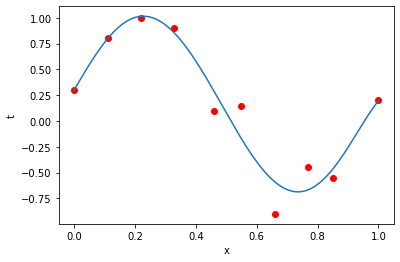

In [109]:
# bậc 6
test_6 = LinearRegression()
test_6.fit(x = [u_1, u_2, u_3, u_4, u_5, u_6], y= t)
print("w = ", test_6.theta)
test_6.plot(x, t)

# Good

w =  [[ 2.99993227e-01]
 [ 2.44127090e+02]
 [-5.67835287e+03]
 [ 5.27060408e+04]
 [-2.55838642e+05]
 [ 7.19653347e+05]
 [-1.21544463e+06]
 [ 1.21470350e+06]
 [-6.61443970e+05]
 [ 1.51098481e+05]]


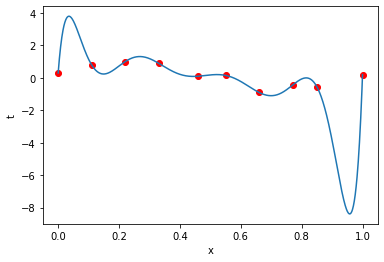

In [97]:
#bậc 9
test_9 = LinearRegression()
test_9.fit(x = [u_1, u_2, u_3, u_4, u_5, u_6, u_7, u_8, u_9], y= t)
print("w = ", test_9.theta)
test_9.plot(x, t)

# Overfitting

# Bài 2b
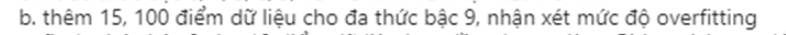

In [116]:
def create_data(n):
    """Create dataset with length = n"""
    x_data = np.arange(0, 1.1, 1 / n)
    noise = np.arange(-0.2, 0.3, 0.1)
    y_data = np.array([])
    for e in x_data:
        err = random.choice(noise)
        y_data = np.append(y_data, np.sin(2 * np.pi * e) + err)
    return x_data, y_data

In [121]:
x_15_add, t_15_add = create_data(15)
x_15_add = x_15_add.reshape(-1, 1)
t_15_add = t_15_add.reshape(-1, 1)

In [125]:
x_15_add

array([[0.        ],
       [0.06666667],
       [0.13333333],
       [0.2       ],
       [0.26666667],
       [0.33333333],
       [0.4       ],
       [0.46666667],
       [0.53333333],
       [0.6       ],
       [0.66666667],
       [0.73333333],
       [0.8       ],
       [0.86666667],
       [0.93333333],
       [1.        ],
       [1.06666667]])

In [126]:
#append cái add vào data ban đầu
x_25 = np.append(x, x_15_add, axis=0)
t_25 = np.append(t, t_15_add, axis=0)

In [127]:
u_1 = x_25
u_2 = x_25**2
u_3 = x_25**3
u_4 = x_25**4
u_5 = x_25**5
u_6 = x_25**6
u_7 = x_25**7
u_8 = x_25**8
u_9 = x_25**9

w =  [[ 1.95635907e-01]
 [-4.22955876e+00]
 [ 1.95461149e+02]
 [-1.78004905e+03]
 [ 8.39348306e+03]
 [-2.33430404e+04]
 [ 3.87365249e+04]
 [-3.74482078e+04]
 [ 1.94272804e+04]
 [-4.17723069e+03]]


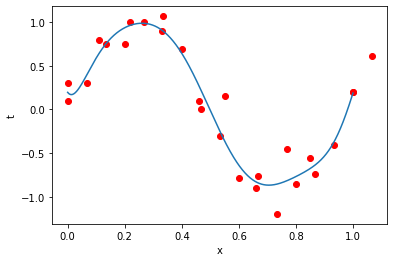

In [128]:
#bậc 9 25 điểm dữ liệu
test_9 = LinearRegression()
test_9.fit(x = [u_1, u_2, u_3, u_4, u_5, u_6, u_7, u_8, u_9], y= t_25)
print("w = ", test_9.theta)
test_9.plot(x_25, t_25)

# Quite Good 

In [133]:
x_100_add, t_100_add = create_data(100)
x_100_add = x_100_add.reshape(-1, 1)
t_100_add = t_100_add.reshape(-1, 1)

In [134]:
x_100 = np.append(x, x_100_add, axis=0)
t_100 = np.append(t, t_100_add, axis=0)

In [135]:
u_1 = x_100
u_2 = x_100**2
u_3 = x_100**3
u_4 = x_100**4
u_5 = x_100**5
u_6 = x_100**6
u_7 = x_100**7
u_8 = x_100**8
u_9 = x_100**9

w =  [[ 8.17499039e-02]
 [-6.56728440e-01]
 [ 1.27788972e+02]
 [-1.03266552e+03]
 [ 4.04591650e+03]
 [-9.48039268e+03]
 [ 1.35617233e+04]
 [-1.14828406e+04]
 [ 5.27244307e+03]
 [-1.01142382e+03]]


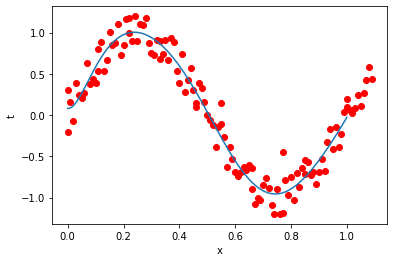

In [136]:
#bậc 9 110 điểm dữ liệu
test_9 = LinearRegression()
test_9.fit(x = [u_1, u_2, u_3, u_4, u_5, u_6, u_7, u_8, u_9], y= t_100)
print("w = ", test_9.theta)
test_9.plot(x_100, t_100)

# Super good

# Bài 2c

# Ridge


In [138]:
data_prob2 = np.array(
         [[0,    0.3],
          [0.11, 0.8],
          [0.22, 1],
          [0.33, 0.9],
          [0.46, 0.1],
          [0.55, 0.15],
          [0.66, -0.9],
          [0.77, -0.45],
          [0.85, -0.55],
          [1, 0.2]])

In [151]:
x = data_prob2[:, 0].reshape(-1, 1)
t = data_prob2[:, 1]

In [152]:
t

array([ 0.3 ,  0.8 ,  1.  ,  0.9 ,  0.1 ,  0.15, -0.9 , -0.45, -0.55,
        0.2 ])

In [142]:
# Ridge
ridge = LinearRegression()
ridge.ridge_fit(0.0007, x, t, 9)

array([[ 0.41069436],
       [ 4.51427852],
       [-9.99338552],
       [-3.21012192],
       [ 2.53420895],
       [ 4.61974809],
       [ 4.01652992],
       [ 1.91362818],
       [-0.84541854],
       [-3.74622407]])

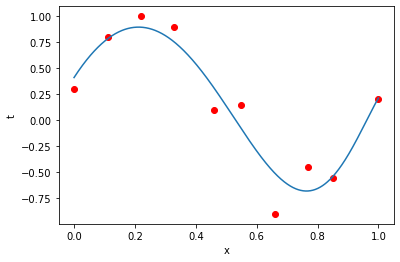

In [143]:
ridge.plot(x, t)

In [148]:
class Lasso_Regression():
  #initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

  # fitting the dataset to the Lasso Regression model
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):     # missed "self"
            self.upadte_weights()

    def upadte_weights(self):
        Y_prediction = self.predict(self.X)
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i]>0:
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 
            else :
                dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

        db = - 2 * np.sum(self.Y - Y_prediction) / self.m
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self,X):
        return X.dot(self.w) + self.b

In [176]:
x_process = np.copy(x)

for i in range(2, 10):
    X_i = x**i 
    x_process = np.concatenate((x_process, X_i), axis = 1)
x_process = np.insert(x_process, 0, [1] * x_process.shape[0], axis = 1)

In [226]:
model = Lasso_Regression(learning_rate = 0.1, no_of_iterations=1000,
                         lambda_parameter=150)

In [227]:
t = data_prob2[:, 1]
model.fit(x_process, t)


In [228]:
model.w

array([ 0.70753262,  0.46250819, -1.46633615, -1.22499566, -1.2958258 ,
        0.99365025, -0.27621348,  1.02618342, -0.98741526, -0.23319909])

Text(0, 0.5, 't')

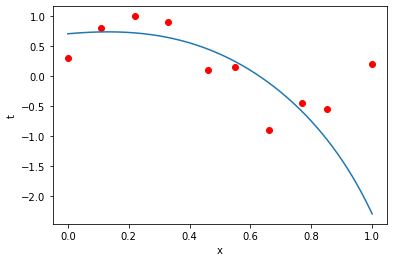

In [229]:

#plot
x0 = np.linspace(0, 1, 1000, endpoint=True)
y0 = np.array([model.w[0]]*len(x0))

for i in range(1, len(model.w)): #tích vô hướng
    y0 = y0 + model.w[i]*(x0**i) 

plt.plot(x, t, 'ro')     # data ban đầu vẽ thành chấm đỏ
plt.plot(x0, y0)             # the fitting line
plt.xlabel('x')
plt.ylabel('t')